In [1]:
#Librerias
import pandas as pd
import numpy as np
import os

In [2]:
path = 'Data/'
sports = pd.read_excel(path+'sports.xlsx')

In [3]:
sports.head()

,CuotaFavorito,Date,Favorito,GanaFavorito,Sport,Tournament
0,2.20,2000-08-19,H,1,Football,E0
1,1.60,2000-08-19,H,1,Football,E0
2,2.20,2000-08-19,H,0,Football,E0
3,1.80,2000-08-19,H,0,Football,E0
4,1.55,2000-08-19,H,1,Football,E0


In [4]:
#Creamos una función que convierta la cuota en una probabilidad, para así hacer un análisis más sencillo.
#Esta probabilidad será la que tiene de ganar el favorito

def prob(a):
    return (1/a)*100

In [5]:
sports['Probabilidad'] = sports['CuotaFavorito'].apply(prob)

In [6]:
sports.head()

,CuotaFavorito,Date,Favorito,GanaFavorito,Sport,Tournament,Probabilidad
0,2.20,2000-08-19,H,1,Football,E0,45.454545
1,1.60,2000-08-19,H,1,Football,E0,62.500000
2,2.20,2000-08-19,H,0,Football,E0,45.454545
3,1.80,2000-08-19,H,0,Football,E0,55.555556
4,1.55,2000-08-19,H,1,Football,E0,64.516129


In [7]:
sports.dtypes

CuotaFavorito           float64
Date             datetime64[ns]
Favorito                 object
GanaFavorito              int64
Sport                    object
Tournament               object
Probabilidad            float64
dtype: object

## El primer análisis que haremos será apostar 10€ siempre al favorito.

In [87]:
sports['Hucha100'] = np.where(sports['GanaFavorito'] == 1, sports['CuotaFavorito']*10-10, -10)

In [91]:
sports.head()

,CuotaFavorito,Date,Favorito,GanaFavorito,Sport,Tournament,Probabilidad,Hucha100,HuchaB
0,2.20,2000-08-19,H,1,Football,E0,45.454545,12.0,0.545455
1,1.60,2000-08-19,H,1,Football,E0,62.500000,6.0,0.375000
2,2.20,2000-08-19,H,0,Football,E0,45.454545,-10.0,-0.454545
3,1.80,2000-08-19,H,0,Football,E0,55.555556,-10.0,-0.555556
4,1.55,2000-08-19,H,1,Football,E0,64.516129,5.5,0.354839


In [88]:
sports['Hucha100'].sum()

-163289.0

In [85]:
sports['HuchaB'] = np.where(sports['GanaFavorito'] == 1, (sports['CuotaFavorito']*sports['Probabilidad']/100)-(sports['Probabilidad']/100), -sports['Probabilidad']/100)

In [86]:
sports['HuchaB'].sum()

-9219.514371700518

In [11]:
import matplotlib.pyplot as plt

In [12]:
x = sports['CuotaFavorito']

In [13]:
favoritos = sports[sports['GanaFavorito'] == 1]

In [14]:
favoritos

,CuotaFavorito,Date,Favorito,GanaFavorito,Sport,Tournament,Probabilidad,Hucha100
0,2.20,2000-08-19,H,1,Football,E0,45.454545,120.0
1,1.60,2000-08-19,H,1,Football,E0,62.500000,60.0
4,1.55,2000-08-19,H,1,Football,E0,64.516129,55.0
6,1.25,2000-08-19,H,1,Football,E0,80.000000,25.0
8,1.50,2000-08-19,H,1,Football,E0,66.666667,50.0
9,1.45,2000-08-20,H,1,Football,E0,68.965517,45.0
10,2.10,2000-08-21,H,1,Football,E0,47.619048,110.0
14,1.60,2000-08-23,H,1,Football,E0,62.500000,60.0
15,2.40,2000-08-23,H,1,Football,E0,41.666667,140.0
16,1.55,2000-08-23,H,1,Football,E0,64.516129,55.0


In [140]:
bb = favoritos.groupby('CuotaFavorito',as_index=False)['GanaFavorito'].sum()

In [139]:
favoritos.groupby('CuotaFavorito',as_index=False).sum()

,CuotaFavorito,GanaFavorito,Probabilidad,Hucha100
0,1.000,96,9600.000000,0.0
1,1.001,1,99.900100,0.1
2,1.002,57,5688.622754,11.4
3,1.003,1,99.700897,0.3
4,1.005,103,10248.756219,51.5
5,1.010,644,63762.376238,644.0
6,1.015,2,197.044335,3.0
7,1.020,657,64411.764706,1314.0
8,1.030,640,62135.922330,1920.0
9,1.040,739,71057.692308,2956.0


In [141]:
aa = sports.groupby('CuotaFavorito',as_index=False)['Favorito'].count()

In [142]:
aa = aa.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [143]:
bb = bb.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [137]:
type(bb)

pandas.core.frame.DataFrame

In [148]:
cc = aa.merge(bb, how='left')

In [159]:
cc

,CuotaFavorito,Favorito,GanaFavorito,Porcentaje
0,1.000,96,96.0,1.000000
1,1.001,1,1.0,1.000000
2,1.002,60,57.0,0.950000
3,1.003,1,1.0,1.000000
4,1.005,103,103.0,1.000000
5,1.010,657,644.0,0.980213
6,1.015,2,2.0,1.000000
7,1.020,688,657.0,0.954942
8,1.030,665,640.0,0.962406
9,1.040,783,739.0,0.943806


In [150]:
cc['Porcentaje'] = cc['GanaFavorito']/cc['Favorito']

In [15]:
x2 = favoritos['CuotaFavorito']

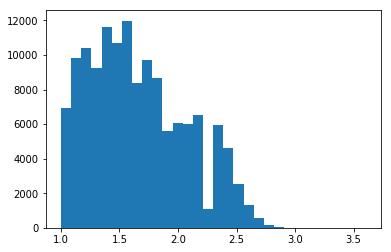

In [37]:
plt.hist(x2, bins=30)
plt.show()

In [47]:
agrupado = sports.groupby('CuotaFavorito')['GanaFavorito','Hucha100'].sum()

In [48]:
agrupado.head()

,GanaFavorito,Hucha100
CuotaFavorito,,
1.000,96,0.0
1.001,1,0.1
1.002,57,-288.6
1.003,1,0.3
1.005,103,51.5


In [95]:
sports.groupby(['CuotaFavorito','GanaFavorito']).count()

Date  Favorito  Sport  Tournament  Probabilidad  \
CuotaFavorito GanaFavorito                                                    
1.000         1               96        96     96          96            96   
1.001         1                1         1      1           1             1   
1.002         0                3         3      3           3             3   
              1               57        57     57          57            57   
1.003         1                1         1      1           1             1   
1.005         1              103       103    103         103           103   
1.010         0               13        13     13          13            13   
              1              644       644    644         644           644   
1.015         1                2         2      2           2             2   
1.020         0               31        31     31          31            31   
              1              657       657    657         657           657   
1.030         0               25        25     25          25            25   
              1              640       640    640         640           640   
1.040         0               44        44     44          44            44   
              1              739       739    739         739           739   
1.050         0               68        68     68          68            68   
              1              878       878    878         878           878   
1.056         1                1         1      1           1             1   
1.060         0               76        76     76          76            76   
              1              892       892    892         892           892   
1.062         1                2         2      2           2             2   
1.063         0                8         8      8           8             8   
              1               46        46     46          46            46   
1.070         0               93        93     93          93            93   
              1              928       928    928         928           928   
1.071         0                2         2      2           2             2   
              1               43        43     43          43            43   
1.080         0              158       158    158         158           158   
              1             1122      1122   1122        1122          1122   
1.083         0                3         3      3           3             3   
...                          ...       ...    ...         ...           ...   
2.830         1                7         7      7           7             7   
2.840         0                5         5      5           5             5   
              1                2         2      2           2             2   
2.850         0                7         7      7           7             7   
              1                3         3      3           3             3   
2.860         0                5         5      5           5             5   
              1                3         3      3           3             3   
2.870         0                8         8      8           8             8   
              1                5         5      5           5             5   
2.880         0                4         4      4           4             4   
              1                2         2      2           2             2   
2.890         0                4         4      4           4             4   
              1                2         2      2           2             2   
2.900         0                7         7      7           7             7   
              1                2         2      2           2             2   
2.910         0                3         3      3           3             3   
2.930         0                4         4      4           4             4   
2.950         0                2         2      2           2             2   

In [93]:
sports.groupby(['CuotaFavorito','GanaFavorito']).count().to_excel('test.xlsx')

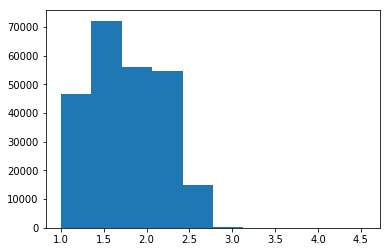

In [17]:
if np.where(sports[sports['GanaFavorito'] == 1]): 
    plt.hist(x)